# Cereal Challenge

First I made a dataframe from the csv file of cereal information.

## Challenege 1

In [51]:
import pandas as pd

raw_cereal_data = pd.read_csv("../data/extra-challenge/cereals/cereal.csv")

raw_cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193


Next I made a new dataframe with my new cereal information.

In [52]:
new_cereals = {
    "name" : ["Creepy Corn", "Wet  Wheaties", "Frog Flakes"],
    "mfr" : ["K", "Q", "R"],
    "type" : ["C","C","C"],
    "calories": [99, 104, 150],
    "protein" : [2,3,4],
    "fat"	: [1,1,1],
    "sodium"	: [150,140,160],
    "fiber"	: [4,1,2],
    "carbo"	: [12,11,10],
    "sugars"	: [10,15,9],
    "potass"	: [90,130,120],
    "vitamins"	: [18,15,12],
    "shelf"	: [1,2,3],
    "weight"	: [1,1,1],
    "cups"	: [0.85,0.9,1],
    "rating" : [30.828392,60.828392,45.828392]
}

new_cereals_df = pd.DataFrame(new_cereals)
new_cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Creepy Corn,K,C,99,2,1,150,4,12,10,90,18,1,1,0.85,30.828392
1,Wet Wheaties,Q,C,104,3,1,140,1,11,15,130,15,2,1,0.90,60.828392
2,Frog Flakes,R,C,150,4,1,160,2,10,9,120,12,3,1,1.00,45.828392


These two dataframes are merged together and the index reset to replace duplicate indexes for the new cerieal rows.

In [53]:
cereal_merged = pd.concat([raw_cereal_data,new_cereals_df])
cereal_merged = cereal_merged.reset_index()
cereal_merged['index'] = cereal_merged.index
cereal_merged

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193
76,76,Wheaties Honey Gold,G,C,110.0,2,1,200,1.0,16.0,NaN,60,25,1,1.0,0.75,36.187559
77,77,Creepy Corn,K,C,99.0,2,1,150,4.0,12.0,10.0,90,18,1,1.0,0.85,30.828392
78,78,Wet Wheaties,Q,C,104.0,3,1,140,1.0,11.0,15.0,130,15,2,1.0,0.90,60.828392


A new dataframe with the new post-tax sugar values (20% lower than original) is produced below:

In [54]:
post_sugar_tax = (cereal_merged[['sugars']]*0.8).copy().rename(columns={"sugars":"sugars (post-tax)"})
post_sugar_tax

,sugars (post-tax)
0,4.8
1,6.4
2,4.0
3,0.0
4,6.4
...,...
75,2.4
76,NaN
77,8.0
78,12.0


This new dataframe is inserted next to the sugar column in the full dataframe.

In [55]:
cereal_merged.insert(11,'sugars (post-tax)', post_sugar_tax)
cereal_merged

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins,shelf,weight,cups,rating
0,0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,4.8,280,25,3,1.0,0.33,68.402973
1,1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,6.4,135,0,3,1.0,1.00,33.983679
2,2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,4.0,320,25,3,1.0,0.33,59.425505
3,3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,0.0,330,25,3,1.0,0.50,93.704912
4,4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,6.4,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,2.4,110,25,1,1.0,1.00,51.592193
76,76,Wheaties Honey Gold,G,C,110.0,2,1,200,1.0,16.0,NaN,NaN,60,25,1,1.0,0.75,36.187559
77,77,Creepy Corn,K,C,99.0,2,1,150,4.0,12.0,10.0,8.0,90,18,1,1.0,0.85,30.828392
78,78,Wet Wheaties,Q,C,104.0,3,1,140,1.0,11.0,15.0,12.0,130,15,2,1.0,0.90,60.828392


## Challenge 2

I think the type column as it appears all rows are type 'C' (presumably to indicate cereal). I will check this and if true drop the column as it isn't giving useful information. 

In [56]:
cereal_merged.loc[cereal_merged['type'] != 'C']

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins,shelf,weight,cups,rating
20,20,Cream of Wheat (Quick),N,H,100.0,3,0,80,1.0,21.0,0.0,0.0,-1,0,2,1.0,1.00,64.533816
43,43,Maypo,A,H,100.0,4,1,0,0.0,16.0,3.0,2.4,95,25,2,1.0,1.00,54.850917
57,57,Quaker Oatmeal,Q,H,100.0,5,2,0,2.7,-1.0,-1.0,-0.8,110,0,1,1.0,0.67,50.828392


This assumption was not correct, there are three entries with type 'H' so I will not drop the column. H seems to indicate oatmeal type foods.

I will re-order the columns to group together relevant information.

In [57]:
column_order = ['index', 'name', 'mfr', 'type', 'shelf', 'weight', 'cups', 'rating','calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'sugars (post-tax)', 'potass', 'vitamins']
cereal_merged = cereal_merged[column_order]
cereal_merged.head()

,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
0,0,100% Bran,N,C,3,1.0,0.33,68.402973,70.0,4,1,130,10.0,5.0,6.0,4.8,280,25
1,1,100% Natural Bran,Q,C,3,1.0,1.00,33.983679,120.0,3,5,15,2.0,8.0,8.0,6.4,135,0
2,2,All-Bran,K,C,3,1.0,0.33,59.425505,70.0,4,1,260,9.0,7.0,5.0,4.0,320,25
3,3,All-Bran with Extra Fiber,K,C,3,1.0,0.50,93.704912,50.0,4,0,140,14.0,8.0,0.0,0.0,330,25
4,4,Almond Delight,R,C,3,1.0,0.75,34.384843,110.0,2,2,200,1.0,14.0,8.0,6.4,-1,25


I used the describe function to get an overview of the numerical data. 

In [58]:
cereal_merged.describe()

,index,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
count,80.0000,80.000000,80.000000,80.000000,80.000000,76.000000,80.000000,80.00000,80.00000,80.000000,80.000000,75.000000,75.000000,80.000000,80.000000
mean,39.5000,2.200000,1.028500,0.824625,42.784306,107.276316,2.562500,1.01250,159.31250,2.158750,14.462500,6.826667,5.461333,96.725000,27.750000
std,23.2379,0.832869,0.147701,0.229308,13.996239,20.229746,1.088998,0.98718,82.26133,2.350529,4.255878,4.467218,3.573774,70.076265,22.065208
min,0.0000,1.000000,0.500000,0.250000,18.042851,50.000000,1.000000,0.00000,0.00000,0.000000,-1.000000,-1.000000,-0.800000,-1.000000,0.000000
25%,19.7500,1.000000,1.000000,0.670000,32.932466,100.000000,2.000000,0.00000,133.75000,1.000000,12.000000,3.000000,2.400000,40.000000,25.000000
50%,39.5000,2.000000,1.000000,0.775000,40.424490,110.000000,3.000000,1.00000,170.00000,2.000000,14.000000,6.000000,4.800000,90.000000,25.000000
75%,59.2500,3.000000,1.000000,1.000000,51.019342,112.500000,3.000000,1.25000,210.00000,3.000000,17.000000,10.500000,8.400000,120.000000,25.000000
max,79.0000,3.000000,1.500000,1.500000,93.704912,160.000000,6.000000,5.00000,320.00000,14.000000,23.000000,15.000000,12.000000,330.000000,100.000000


Looking at the count there are some missing values for calories and sugars, I checked the csv file and they are indeed missing. 

There appear to be some negative values of carbohydrates, sugars and potass which seems like it must be an error. I am also suspicious of the zero values for fat, fibre and vitamins. 

In [59]:
cereal_merged.loc[cereal_merged['carbo'] <= 0]


,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
57,57,Quaker Oatmeal,Q,H,1,1.0,0.67,50.828392,100.0,5,2,0,2.7,-1.0,-1.0,-0.8,110,0


In [60]:
cereal_merged.loc[cereal_merged['sugars'] <= 0]

,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
3,3,All-Bran with Extra Fiber,K,C,3,1.00,0.50,93.704912,50.0,4,0,140,14.0,8.0,0.0,0.0,330,25
20,20,Cream of Wheat (Quick),N,H,2,1.00,1.00,64.533816,100.0,3,0,80,1.0,21.0,0.0,0.0,-1,0
54,54,Puffed Rice,Q,C,3,0.50,1.00,60.756112,50.0,1,0,0,0.0,13.0,0.0,0.0,15,0
55,55,Puffed Wheat,Q,C,3,0.50,1.00,63.005645,50.0,2,0,0,1.0,10.0,0.0,0.0,50,0
57,57,Quaker Oatmeal,Q,H,1,1.00,0.67,50.828392,100.0,5,2,0,2.7,-1.0,-1.0,-0.8,110,0
63,63,Shredded Wheat,N,C,1,0.83,1.00,68.235885,80.0,2,0,0,3.0,16.0,0.0,0.0,95,0
64,64,Shredded Wheat 'n'Bran,N,C,1,1.00,0.67,74.472949,90.0,3,0,0,4.0,19.0,0.0,0.0,140,0
65,65,Shredded Wheat spoon size,N,C,1,1.00,0.67,72.801787,90.0,3,0,0,3.0,20.0,0.0,0.0,120,0


This would need further investigation and probably cleaning up of the data before analysis is conducted.

Next I will index by Manufacturer:

In [61]:
cereal_merged_mfr = cereal_merged.set_index('mfr').sort_index()
cereal_merged_mfr

,index,name,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
mfr,,,,,,,,,,,,,,,,,
A,43,Maypo,H,2,1.0,1.00,54.850917,100.0,4,1,0,0.0,16.0,3.0,2.4,95,25
G,71,Total Whole Grain,C,3,1.0,1.00,46.658844,100.0,3,1,200,3.0,16.0,3.0,2.4,110,100
G,36,Honey Nut Cheerios,C,1,1.0,0.75,31.072217,NaN,3,1,250,1.5,11.5,10.0,8.0,90,25
G,59,Raisin Nut Bran,C,3,1.0,0.50,39.703400,100.0,3,2,140,2.5,10.5,8.0,6.4,140,25
G,40,Kix,C,2,1.0,1.50,39.241114,110.0,2,1,260,0.0,21.0,3.0,2.4,40,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R,15,Corn Chex,C,1,1.0,1.00,41.445019,110.0,2,0,280,0.0,22.0,3.0,2.4,25,25
R,23,Double Chex,C,3,1.0,0.75,44.330856,100.0,2,0,190,1.0,18.0,5.0,4.0,80,25
R,45,Muesli Raisins; Peaches; & Pecans,C,3,1.0,1.00,34.139765,150.0,4,3,150,3.0,16.0,11.0,8.8,170,25


In [62]:
cereal_merged_mfr.loc['N']

,index,name,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
mfr,,,,,,,,,,,,,,,,,
N,68,Strawberry Fruit Wheats,C,2,1.00,1.00,59.363993,90.0,2,0,15,3.0,15.0,5.0,4.0,90,25
N,63,Shredded Wheat,C,1,0.83,1.00,68.235885,80.0,2,0,0,3.0,16.0,0.0,0.0,95,0
N,64,Shredded Wheat 'n'Bran,C,1,1.00,0.67,74.472949,90.0,3,0,0,4.0,19.0,0.0,0.0,140,0
N,65,Shredded Wheat spoon size,C,1,1.00,0.67,72.801787,90.0,3,0,0,3.0,20.0,0.0,0.0,120,0
N,0,100% Bran,C,3,1.00,0.33,68.402973,70.0,4,1,130,10.0,5.0,6.0,4.8,280,25
N,20,Cream of Wheat (Quick),H,2,1.00,1.00,64.533816,100.0,3,0,80,1.0,21.0,0.0,0.0,-1,0


Indexed by sodium content:

In [63]:
cereal_merged_Na = cereal_merged.set_index('sodium')
cereal_merged_Na.head()

,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
sodium,,,,,,,,,,,,,,,,,
130,0,100% Bran,N,C,3,1.0,0.33,68.402973,70.0,4,1,10.0,5.0,6.0,4.8,280,25
15,1,100% Natural Bran,Q,C,3,1.0,1.00,33.983679,120.0,3,5,2.0,8.0,8.0,6.4,135,0
260,2,All-Bran,K,C,3,1.0,0.33,59.425505,70.0,4,1,9.0,7.0,5.0,4.0,320,25
140,3,All-Bran with Extra Fiber,K,C,3,1.0,0.50,93.704912,50.0,4,0,14.0,8.0,0.0,0.0,330,25
200,4,Almond Delight,R,C,3,1.0,0.75,34.384843,110.0,2,2,1.0,14.0,8.0,6.4,-1,25


In [64]:
cereal_merged_Na.loc[135]

,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
sodium,,,,,,,,,,,,,,,,,
135,29,Fruity Pebbles,P,C,2,1.0,0.75,28.025765,110.0,1,1,0.0,13.0,12.0,9.6,25,25
135,56,Quaker Oat Squares,Q,C,3,1.0,0.50,49.511874,100.0,4,1,2.0,14.0,6.0,4.8,110,25


## Challenge 3

The first part of the challenege is to plot the calories of each cereal against their sugar content.

<function matplotlib.pyplot.show(close=None, block=None)>

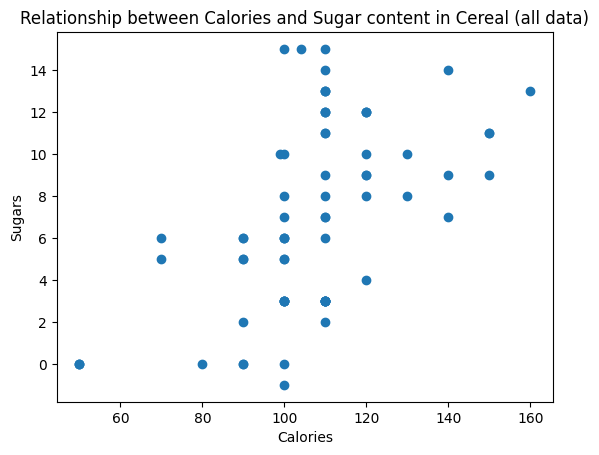

In [65]:
import matplotlib.pyplot as plt

cereal_cals = cereal_merged['calories']
cereal_sugars = cereal_merged['sugars']
cereal_names = cereal_merged['name']
plt.scatter(cereal_cals, cereal_sugars)
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title('Relationship between Calories and Sugar content in Cereal (all data)')
plt.show

I noted in the last challenge when I used the describe method that there is some suspicious calorie and sugar data. This can be seen on the graph as the points at 0 or below on the y-axis, of which there are at least 5 (could be repeats at the same datapoint). 

The operation below brings up all this data i.e. data with carbo or sugars zero or below, deleting duplicates. 

In [66]:
sus_rows = pd.concat([cereal_merged.loc[cereal_merged['carbo'] <= 0], cereal_merged.loc[cereal_merged['sugars'] <= 0]]).drop_duplicates()
sus_rows


,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
57,57,Quaker Oatmeal,Q,H,1,1.00,0.67,50.828392,100.0,5,2,0,2.7,-1.0,-1.0,-0.8,110,0
3,3,All-Bran with Extra Fiber,K,C,3,1.00,0.50,93.704912,50.0,4,0,140,14.0,8.0,0.0,0.0,330,25
20,20,Cream of Wheat (Quick),N,H,2,1.00,1.00,64.533816,100.0,3,0,80,1.0,21.0,0.0,0.0,-1,0
54,54,Puffed Rice,Q,C,3,0.50,1.00,60.756112,50.0,1,0,0,0.0,13.0,0.0,0.0,15,0
55,55,Puffed Wheat,Q,C,3,0.50,1.00,63.005645,50.0,2,0,0,1.0,10.0,0.0,0.0,50,0
63,63,Shredded Wheat,N,C,1,0.83,1.00,68.235885,80.0,2,0,0,3.0,16.0,0.0,0.0,95,0
64,64,Shredded Wheat 'n'Bran,N,C,1,1.00,0.67,74.472949,90.0,3,0,0,4.0,19.0,0.0,0.0,140,0
65,65,Shredded Wheat spoon size,N,C,1,1.00,0.67,72.801787,90.0,3,0,0,3.0,20.0,0.0,0.0,120,0


There are 8 rows of data that match these criteria. Several merge together on the graph as they have the same values. 

I believe it is best to exclude these datapoints as I don't think suitable replacement values can be used as there is no data at all for sugars for these cereals, and the only obviously related value, the calories, is what we are testing the relationship for. 

I will therefore drop these rows and redraw the graph with the cleaned data (in the next section). 

In [67]:
cereal_data_cleaned = cereal_merged.drop(list(sus_rows['index']))
cereal_data_cleaned

,index,name,mfr,type,shelf,weight,cups,rating,calories,protein,fat,sodium,fiber,carbo,sugars,sugars (post-tax),potass,vitamins
0,0,100% Bran,N,C,3,1.0,0.33,68.402973,70.0,4,1,130,10.0,5.0,6.0,4.8,280,25
1,1,100% Natural Bran,Q,C,3,1.0,1.00,33.983679,120.0,3,5,15,2.0,8.0,8.0,6.4,135,0
2,2,All-Bran,K,C,3,1.0,0.33,59.425505,70.0,4,1,260,9.0,7.0,5.0,4.0,320,25
4,4,Almond Delight,R,C,3,1.0,0.75,34.384843,110.0,2,2,200,1.0,14.0,8.0,6.4,-1,25
5,5,Apple Cinnamon Cheerios,G,C,1,1.0,0.75,29.509541,110.0,2,2,180,1.5,10.5,NaN,NaN,70,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Wheaties,G,C,1,1.0,1.00,51.592193,100.0,3,1,200,3.0,17.0,3.0,2.4,110,25
76,76,Wheaties Honey Gold,G,C,1,1.0,0.75,36.187559,110.0,2,1,200,1.0,16.0,NaN,NaN,60,25
77,77,Creepy Corn,K,C,1,1.0,0.85,30.828392,99.0,2,1,150,4.0,12.0,10.0,8.0,90,18
78,78,Wet Wheaties,Q,C,2,1.0,0.90,60.828392,104.0,3,1,140,1.0,11.0,15.0,12.0,130,15


## Challenge 4

### Does the sugar content influence the calorie count? Visualise your conclusion.

There does appear to be a positive corralation between sugar content and calories in the cereal data. Futher analysis is needed to quantify this correlation.


<function matplotlib.pyplot.show(close=None, block=None)>

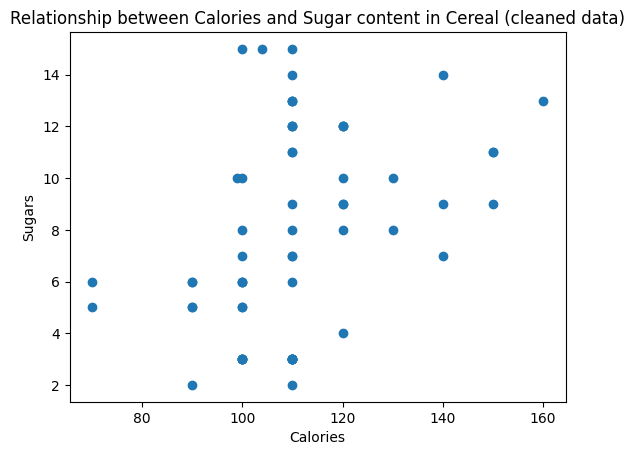

In [68]:
cereal_cleaned_cals = cereal_data_cleaned['calories']
cereal_cleaned_sugars = cereal_data_cleaned['sugars']
plt.scatter(cereal_cleaned_cals, cereal_cleaned_sugars)
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title('Relationship between Calories and Sugar content in Cereal (cleaned data)')
plt.show

### Which are the top 4 cereals for vitamin content?Visualise your conclusion.

First I will go back to the original merged data as cereals with missing sugar data may be fine to use for analysis of vitamins. I found vitamin values of zero or below. Again I believe it is best to exclude these rows so I dropped these and made a new cleaned cereal dataframe.

Then this data could be plotted. 


There are 8 rows of data with 0 or less value for vitamins.
The unique vitamin values are:  [100, 12, 15, 18, 25]


<function matplotlib.pyplot.show(close=None, block=None)>

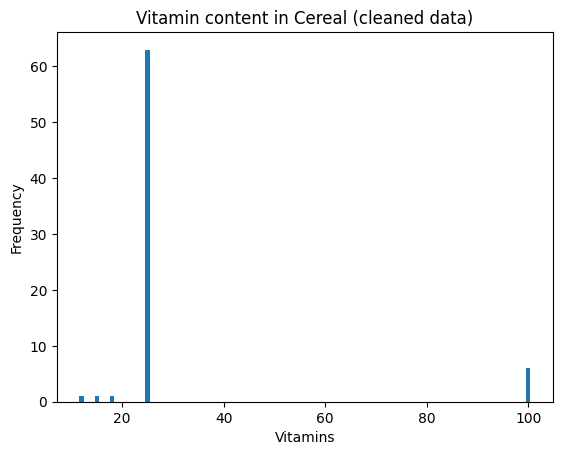

In [69]:
# Remove rows with missing data
sus_rows = cereal_merged.loc[cereal_merged['vitamins'] <= 0]
print(f"There are {len(sus_rows)} rows of data with 0 or less value for vitamins.")
cereal_data_cleaned = cereal_merged.drop(list(sus_rows['index']))

# Set-up data for chart
cereal_cleaned_vits = list(cereal_data_cleaned['vitamins'])
unique_vit_values = list(set(cereal_cleaned_vits))
print("The unique vitamin values are: ", unique_vit_values)
vit_frequency = [cereal_cleaned_vits.count(value) for value in unique_vit_values]
cereal_cleaned_names = cereal_data_cleaned['name']

# Plot bar chart
plt.bar(unique_vit_values, vit_frequency)
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.title('Vitamin content in Cereal (cleaned data)')
plt.show

There are only 5 vitamin values that cereals take, this is odd. The vast majority of cereals have 25 as the value which is also odd. Investigating the data collection further is warranted. 

The highest vitamen content is 100 so I will find these cereals.

In [70]:
max_vit = cereal_merged['vitamins'].max()
high_vit_cereals = cereal_data_cleaned.loc[cereal_merged['vitamins'] == max_vit]
print(f"There are {len(high_vit_cereals)} cereals with the highest vitamin value of {max_vit}, they are: \n", list(high_vit_cereals['name']))

There are 6 cereals with the highest vitamin value of 100, they are: 
 ['Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Product 19', 'Total Corn Flakes', 'Total Raisin Bran', 'Total Whole Grain']


### Which are the top 4 cereals for protein? Visualise your conclusion.

I used the same process for protein. 

There are 0 rows of data with 0 or less value for protein.
The unique protein values are:  [1, 2, 3, 4, 5, 6]
There are 2 cereals with the highest protein value of 6, they are: 
 ['Cheerios', 'Special K']
There are 1 cereals with the second highest protein value of 5, they are: 
 ['Quaker Oatmeal']
There are 9 cereals with the third highest protein value of 4, they are: 
 ['100% Bran', 'All-Bran', 'All-Bran with Extra Fiber', 'Life', 'Maypo', 'Muesli Raisins; Dates; & Almonds', 'Muesli Raisins; Peaches; & Pecans', 'Quaker Oat Squares', 'Frog Flakes']


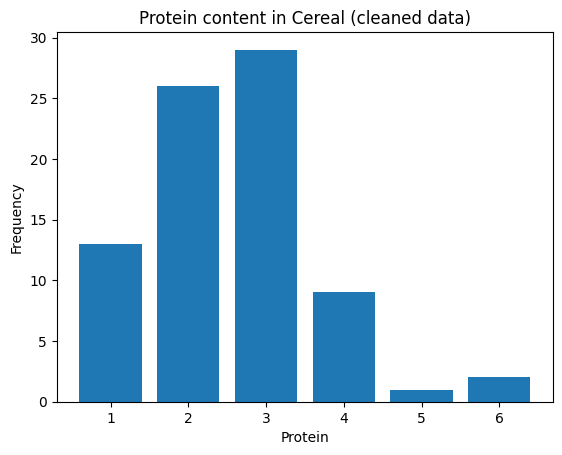

In [71]:
# Remove rows with missing data
sus_rows = cereal_merged.loc[cereal_merged['protein'] <= 0]
print(f"There are {len(sus_rows)} rows of data with 0 or less value for protein.")
cereal_data_cleaned = cereal_merged.drop(list(sus_rows['index']))

# Set-up data for chart
cereal_cleaned_pros = list(cereal_data_cleaned['protein'])
unique_pro_values = list(set(cereal_cleaned_pros))
print("The unique protein values are: ", unique_pro_values)
pro_frequency = [cereal_cleaned_pros.count(value) for value in unique_pro_values]
cereal_cleaned_names = cereal_data_cleaned['name']

# Plot bar chart
plt.bar(unique_pro_values, pro_frequency)
plt.xlabel('Protein')
plt.ylabel('Frequency')
plt.title('Protein content in Cereal (cleaned data)')
plt.show

max_pro = cereal_merged['protein'].max()
high_pro_cereals = cereal_data_cleaned.loc[cereal_merged['protein'] == max_pro]
print(f"There are {len(high_pro_cereals)} cereals with the highest protein value of {max_pro}, they are: \n", list(high_pro_cereals['name']))

pen_pro = max_pro - 1
pen_pro_cereals = cereal_data_cleaned.loc[cereal_merged['protein'] == pen_pro]
print(f"There are {len(pen_pro_cereals)} cereals with the second highest protein value of {pen_pro}, they are: \n", list(pen_pro_cereals['name']))

four_pro = max_pro - 2
four_pro_cereals = cereal_data_cleaned.loc[cereal_merged['protein'] == four_pro]
print(f"There are {len(four_pro_cereals)} cereals with the third highest protein value of {four_pro}, they are: \n", list(four_pro_cereals['name']))

The spread of protein values is much more as expected. 

### Does Sodium content positively or negatively affect overall ranking? Visualise your conclusion.

I made a scatter graph of sodium level vs ranking.

There are 9 rows of data with 0 or less value for sodium.


Text(0.5, 1.0, 'Relationship between Cereal Ranking and Sodium Content (cleaned data)')

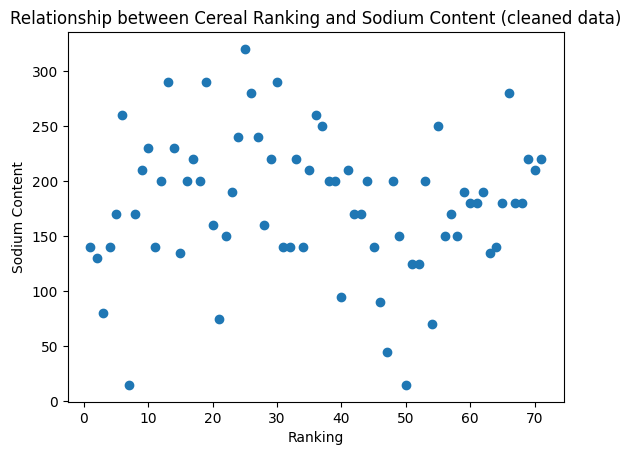

In [72]:
# Remove rows with missing data
sus_rows = cereal_merged.loc[cereal_merged['sodium'] <= 0]
print(f"There are {len(sus_rows)} rows of data with 0 or less value for sodium.")
cereal_data_cleaned = cereal_merged.drop(list(sus_rows['index']))

# Prepare ranked data
rankings = [i for i in range(1,72)]
sodium_content = cereal_data_cleaned.sort_values('rating', ascending=False)['sodium']

# Plot graph
plt.scatter(rankings, sodium_content)
plt.xlabel('Ranking')
plt.ylabel('Sodium Content')
plt.title('Relationship between Cereal Ranking and Sodium Content (cleaned data)')

There is not a strong corralation between the cereal ranking and the sodium content. It is possible on further analysation a weak corralation could be found.

I think a better measure of opinion of a cereal and the sodium content would be to compare the rating rather than the ranking. This is because the opinions on the cereals may not be evenly distributed, there may be a big split in opinions between certain rankings that cannot be seen on the graph above. 

Text(0.5, 1.0, 'Relationship between Cereal Rating and Sodium Content (cleaned data)')

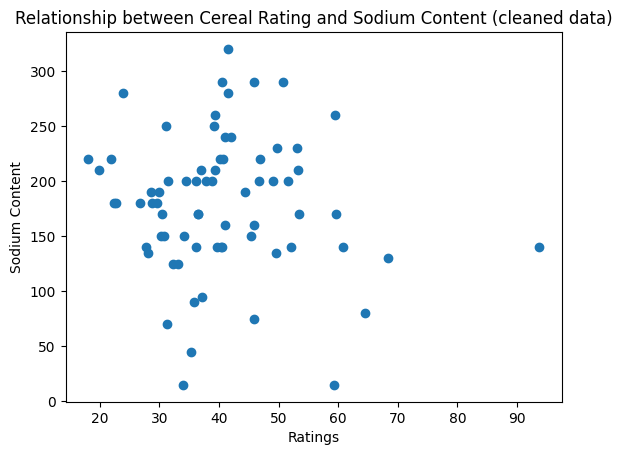

In [73]:
# Prepare data
ratings = cereal_data_cleaned['rating']
sodium_content = cereal_data_cleaned['sodium']

# Plot graph
plt.scatter(ratings, sodium_content)
plt.xlabel('Ratings')
plt.ylabel('Sodium Content')
plt.title('Relationship between Cereal Rating and Sodium Content (cleaned data)')

The graph shows how the ratings are clustered more around approx 40 rather than evenly distributed. There still does not appear to be a strong corralation between the opinion of a cereal and its sodium content.

Interestingly, there is a stand-out cereal with a much higher ranking that any other by far. This would be good to look into data collection to verify that this is supported by the evidence or if there was a small sample size/another explanation for this outlier. 

In [74]:
max_rat = cereal_merged['rating'].max()
high_rat_cereals = cereal_data_cleaned.loc[cereal_merged['rating'] == max_rat]
print(f"The cereal with the highest rating value of {max_rat} is: \n", list(high_rat_cereals['name']))

The cereal with the highest rating value of 93.704912 is: 
 ['All-Bran with Extra Fiber']
